In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras


In [3]:
train_dir='/content/drive/MyDrive/Face_mask/Train'
test_dir='/content/drive/MyDrive/Face_mask/Test'
validation_dir='/content/drive/MyDrive/Face_mask/Validation'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


In [5]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=125,
    class_mode='binary'
)
validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(128,128),
    batch_size=25,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import VGG19

conv_base=VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(128,128,3)
)

80142336/80134624 [==============================] - 2s 0us/step


In [7]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [9]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras import optimizers

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(2e-5),
              metrics=['acc'])

In [13]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("facemaskdetection1-{epoch:02d}.h128")

In [14]:
history=model.fit(train_generator,
                  steps_per_epoch=80,
                  epochs=5,
                  validation_data=validation_generator,
                  validation_steps=32,
                  callbacks=[checkpoint_cb])


Epoch 1/5
80/80 [==============================] - 6396s 79s/step - loss: 0.1993 - acc: 0.8958 - val_loss: 0.0056 - val_acc: 0.9975
INFO:tensorflow:Assets written to: facemaskdetection1-01.h128/assets
Epoch 2/5
80/80 [==============================] - 122s 2s/step - loss: 0.0132 - acc: 0.9960 - val_loss: 0.0233 - val_acc: 0.9925
INFO:tensorflow:Assets written to: facemaskdetection1-02.h128/assets
Epoch 3/5
80/80 [==============================] - 121s 2s/step - loss: 0.0060 - acc: 0.9983 - val_loss: 0.0365 - val_acc: 0.9937
INFO:tensorflow:Assets written to: facemaskdetection1-03.h128/assets
Epoch 4/5
80/80 [==============================] - 121s 2s/step - loss: 0.0033 - acc: 0.9978 - val_loss: 0.0019 - val_acc: 0.9987
INFO:tensorflow:Assets written to: facemaskdetection1-04.h128/assets
Epoch 5/5
80/80 [==============================] - 121s 2s/step - loss: 9.1243e-04 - acc: 0.9996 - val_loss: 0.0014 - val_acc: 0.9987
INFO:tensorflow:Assets written to: facemaskdetection1-05.h128/assets

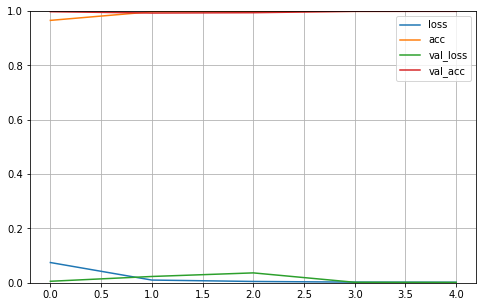

In [20]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
hist_df=pd.DataFrame(history.history)

In [22]:
hist_csv_file='historyfacemask.csv'
with open(hist_csv_file,mode='w') as f:
    hist_df.to_csv(f)

In [23]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=45,
    class_mode='binary'
)


Found 992 images belonging to 2 classes.


In [24]:
model.evaluate(test_generator,steps=20)

20/20 [==============================] - 29s 2s/step - loss: 0.0051 - acc: 0.9989


[0.005103554576635361, 0.9988889098167419]